In [2]:
import pandas as pd
import geopandas as gpd

In [4]:
redline=gpd.read_file('data/sfredlined.geojson')

In [5]:
redline.head()

,name,holc_id,holc_grade,area_description_data,geometry
0,None,A1,A,{'1': 'This area consists of 35 irregularly-sh...,"MULTIPOLYGON (((-122.47554 37.78687, -122.4755..."
1,None,A10,A,{'1': 'This area of 25 irregularly-shaped bloc...,"MULTIPOLYGON (((-122.46089 37.73566, -122.4610..."
2,None,A11,A,"{'1': 'This area, with the exception of the tw...","MULTIPOLYGON (((-122.45619 37.74046, -122.4565..."
3,None,A12,A,"{'1': 'This area, consisting of some 20 blocks...","MULTIPOLYGON (((-122.47154 37.73326, -122.4665..."
4,None,A13,A,{'1': 'This area of some 25 irregularly-shaped...,"MULTIPOLYGON (((-122.46102 37.73572, -122.4608..."


<AxesSubplot: >

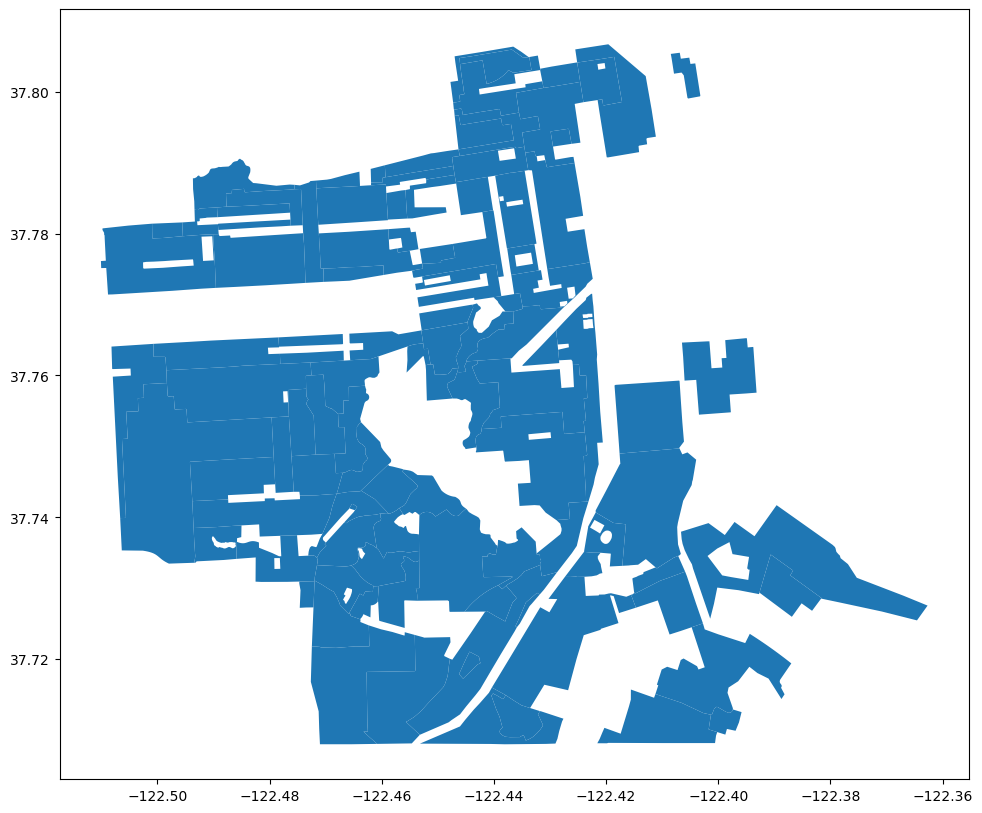

In [7]:
# plot it!
redline.plot(figsize=(12,10))

In [20]:
# tell me more about this dataset
redline.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   name                   0 non-null      object  
 1   holc_id                95 non-null     object  
 2   holc_grade             97 non-null     object  
 3   area_description_data  97 non-null     object  
 4   geometry               97 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 3.9+ KB


In [21]:
# column name in brackets
# single column
redline['holc_grade'].sample(3)

92    D
30    B
58    C
Name: holc_grade, dtype: object

In [22]:
redline['holc_grade'].value_counts()

B    36
C    31
D    17
A    13
Name: holc_grade, dtype: int64

In [58]:
redline.query("holc_grade == 'D'")


,holc_grade,geometry,color
78,D,"MULTIPOLYGON (((-122.44014 37.78329, -122.4419...",red
79,D,"MULTIPOLYGON (((-122.42184 37.74070, -122.4186...",red
80,D,"MULTIPOLYGON (((-122.43538 37.72502, -122.4359...",red
81,D,"MULTIPOLYGON (((-122.41086 37.75907, -122.4069...",red
82,D,"MULTIPOLYGON (((-122.41759 37.74899, -122.4069...",red
83,D,"MULTIPOLYGON (((-122.41119 37.71510, -122.4065...",red
84,D,"MULTIPOLYGON (((-122.40646 37.76463, -122.4019...",red
85,D,"MULTIPOLYGON (((-122.38402 37.73860, -122.3796...",red
86,D,"MULTIPOLYGON (((-122.39823 37.71247, -122.3987...",red
87,D,"MULTIPOLYGON (((-122.43867 37.77118, -122.4400...",red


In [25]:
# now let's create a dataframe with a specific subset of the columns that I identified earlier
redline = redline[['holc_grade', 'geometry']]
redline.head()

,holc_grade,geometry
0,A,"MULTIPOLYGON (((-122.47554 37.78687, -122.4755..."
1,A,"MULTIPOLYGON (((-122.46089 37.73566, -122.4610..."
2,A,"MULTIPOLYGON (((-122.45619 37.74046, -122.4565..."
3,A,"MULTIPOLYGON (((-122.47154 37.73326, -122.4665..."
4,A,"MULTIPOLYGON (((-122.46102 37.73572, -122.4608..."


<AxesSubplot: >

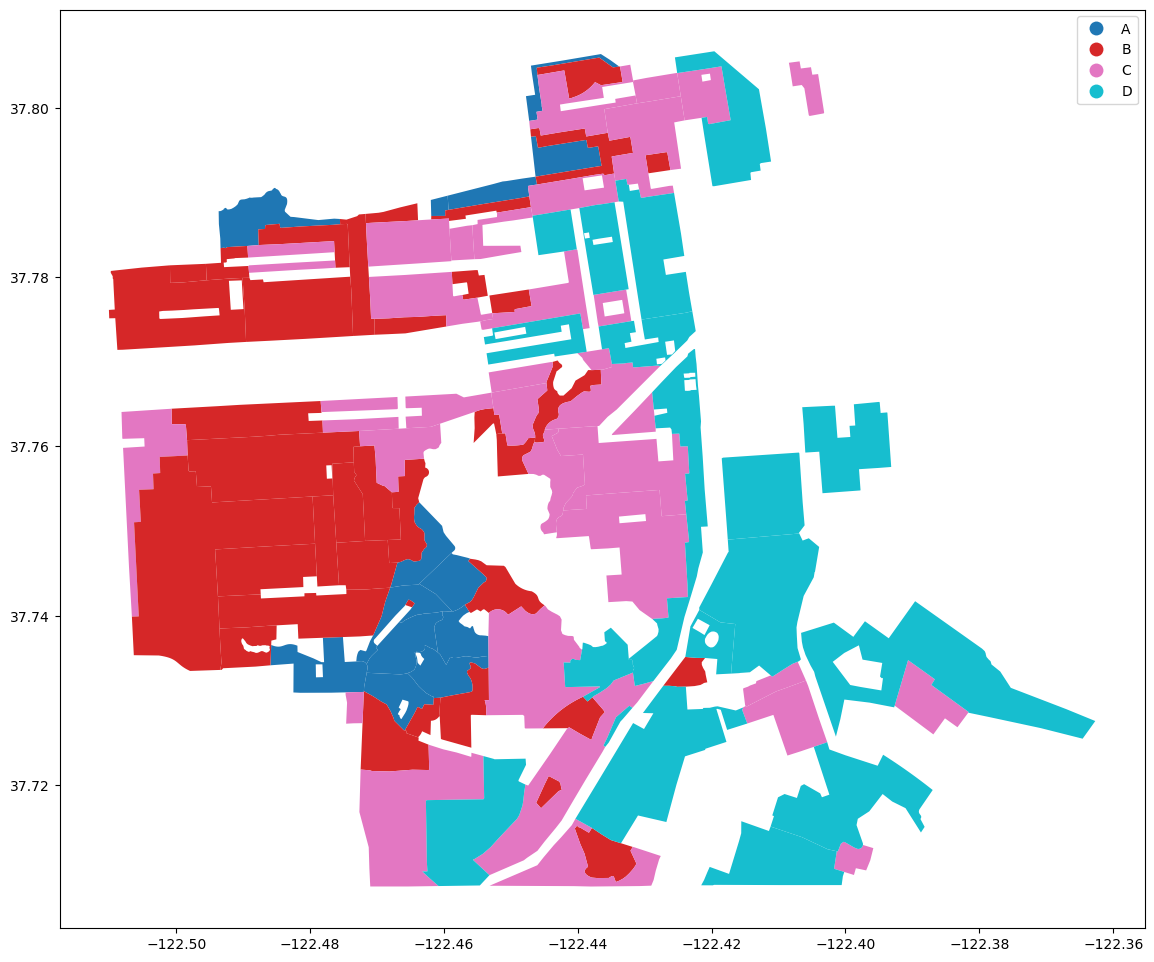

In [28]:
redline.plot(
            figsize=(14,12),   # determines the size of the plot 
            column = 'holc_grade',   # column that defines the color of the dots
            legend = True,     # adds a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this places the legend on the side
) 

In [30]:
# add a new column
redline['color'] = ''

In [31]:
redline.head(3)

,holc_grade,geometry,color
0,A,"MULTIPOLYGON (((-122.47554 37.78687, -122.4755...",
1,A,"MULTIPOLYGON (((-122.46089 37.73566, -122.4610...",
2,A,"MULTIPOLYGON (((-122.45619 37.74046, -122.4565...",


In [32]:
# find unique values in the LINE column
redline.holc_grade.unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [38]:
redline.loc[redline['holc_grade'] == 'A', 'color'] = 'green'
redline.loc[redline['holc_grade'] == 'B', 'color'] = 'blue'
redline.loc[redline['holc_grade'] == 'C', 'color'] = 'yellow'
redline.loc[redline['holc_grade'] == 'D', 'color'] = 'red'

In [52]:
import folium
m = folium.Map(location=[37.7,-122.4], 
               zoom_start = 11,
               tiles='CartoDB positron', 
               attribution='CartoDB')

In [57]:
folium.Choropleth(
                  geo_data=redline, # geo data
                  data=redline, # data          
                  columns=['geometry', 'holc_grade'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.5, # line opacity (of the border)
                  legend_name='Redlining Map').add_to(m)